In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline



In [3]:
# Set the file paths
whale_returns = Path("whale_returns.csv")
algo_returns = Path("algo_returns.csv")
sp500_history = Path("sp500_history.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)


### Whale Returns
Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [5]:
# Count nulls
whale_returns_df.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [28]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

#Verify that all nulls have been dropped
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
algo_returns_df.isnull().count()



Algo 1    1241
Algo 2    1241
dtype: int64

In [57]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

#verify all NAs have been dropped

algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

### S&P 500 Returns
Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [31]:
# Reading S&P 500 Closing Prices
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", infer_datetime_format=True, parse_dates=True)



In [32]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [33]:
# Fix Data Types
sp500_history_df.isnull().count()

sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")


C:\Users\Brian\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [87]:
# Calculate Daily Returns



sp500_daily_ret = sp500_history_df.pct_change()

In [88]:
# Drop nulls

sp500_daily_ret.dropna()

,SP500
Date,
2019-04-16,2.290759
2019-04-15,-0.906968
2019-04-12,-2.658096
2019-04-11,3.956560
2019-04-10,-1.222295
...,...
2012-10-05,1.042546
2012-10-04,-1.187414
2012-10-03,61.865579


In [89]:
# Rename `Close` Column to be specific to this portfolio.

sp500_daily_ret.rename(columns = {"Close" : "SP500"}, inplace=True)

### Combine Whale, Algorithmic, and S&P 500 Returns

In [91]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([sp500_daily_ret, algo_returns_df, whale_returns_df], axis="columns", join="inner")
combined_df.head(-1)

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,0.004969,0.009622,0.007167,0.003485,0.006472,0.013278
2019-04-22,NaN,0.000677,-0.001936,-0.002586,-0.007333,-0.003640,-0.001088
2019-04-18,NaN,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916
2019-04-17,NaN,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-16,2.290759,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
...,...,...,...,...,...,...,...
2015-03-10,-1.572379,-0.001392,-0.012155,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-09,11.767156,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
2015-03-06,-0.854182,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098


## Conduct Quantitative Analysis
In this section, you will calculate and visualize performance and risk metrics for the portfolios.

### Performance Anlysis
Calculate and Plot the daily returns.

In [104]:
# Plot daily returns of all portfolios
whale_daily_returns = (whale_returns_df).pct_change()
algo_daily_returns = (algo_returns_df).pct_change()
sp500_daily_returns = (sp500_history_df).pct_change()

daily_returns = combined_df.pct_change()
daily_returns.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,-0.863857,-1.201184,-1.360764,-3.104305,-1.562478,-1.081925
2019-04-18,NaN,-1.868976,-0.364991,-1.559965,-1.166626,-1.159757,-2.761467
2019-04-17,NaN,16.521245,3.253330,-3.000629,-6.293097,-8.582317,0.681647
2019-04-16,NaN,-0.325825,-1.554579,-1.931873,-1.060020,-0.811553,-0.740329


 Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

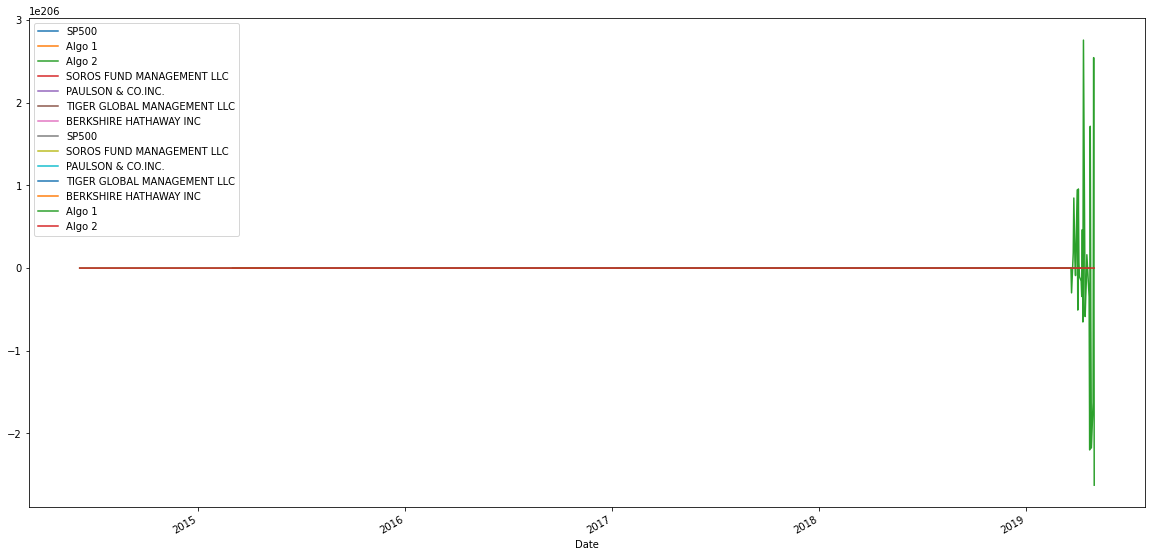

In [93]:
# Calculate cumulative returns of all portfolios
whale_cum_prod = (whale_daily_returns).cumprod()
algo_cum_prod = (algo_daily_returns).cumprod()
sp500_cum_prod = (sp500_daily_returns).cumprod()
daily_returns_cumprod = combined_df.cumprod()

# Plot cumulative returns
ax = daily_returns_cumprod.plot(figsize=(20,10))
sp500_cum_prod.plot(ax=ax)
whale_cum_prod.plot(ax=ax)
algo_cum_prod.plot(ax=ax)

## Risk Analysis
Determine the risk of each portfolio:

1. Create a box plot for each portfolio.
2. Calculate the standard deviation for all portfolios
3. Determine which portfolios are riskier than the S&P 500
4. Calculate the Annualized Standard Deviation



### Create a box plot for each portfolio

<AxesSubplot:>

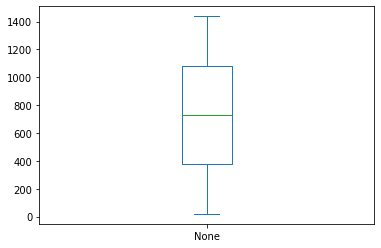

In [94]:
# Box plot to visually show risk
daily_std = daily_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std.plot.box()

### Calculate Standard Deviations

In [95]:
# Calculate the daily standard deviations of all portfolios

whale_std = whale_daily_returns.std()
algo_std = algo_daily_returns.std()



### Determine which portfolios are riskier than the S&P 500

In [96]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_returns.std()
daily_std = daily_std.sort_values(ascending=False)
daily_std.head()


Algo 2                       1438.209915
Algo 1                         19.244662
SP500                                NaN
SOROS FUND MANAGEMENT LLC            NaN
PAULSON & CO.INC.                    NaN
dtype: float64

### Calculate the Annualized Standard Deviation

In [97]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)

annualized_std.head()

Algo 2                       22830.874606
Algo 1                         305.499544
SP500                                 NaN
SOROS FUND MANAGEMENT LLC             NaN
PAULSON & CO.INC.                     NaN
dtype: float64

## Rolling Statistics
Risk changes over time. Analyze the rolling statistics for Risk and Beta.

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling std for all portfolios with 21-day window

In [102]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
port_sma_21 = combined_df.rolling(window=21).mean()
# Plot the rolling standard deviation
port_sma_21

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2015-03-09,0.368004,0.001257,0.000801,0.001330,0.000988,0.001077,0.000783
2015-03-06,0.466032,0.000926,0.000379,0.001013,0.000826,0.000771,0.000070
2015-03-05,0.258260,0.001037,0.000282,0.000948,0.000841,0.000663,0.000156


### Calculate and plot the correlation

<AxesSubplot:>

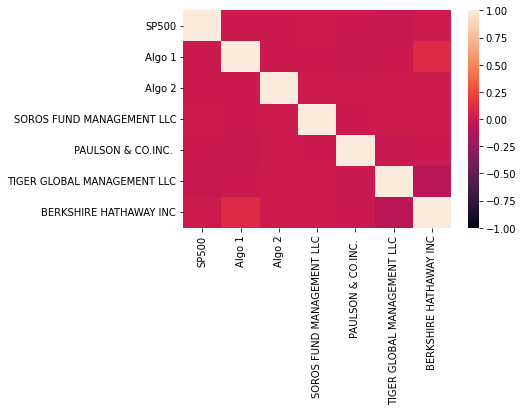

In [100]:
# Calculate the correlation
correlation = daily_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [108]:
# Calculate covariance of a single portfolio
berk_covar = daily_returns['BERKSHIRE HATHAWAY INC'].cov(daily_returns['SP500'])

# Calculate variance of S&P 500
variance = daily_returns['SP500'].var()

# Computing beta
berk_beta = berk_covar / variance

# Plot beta trend

rolling_berk_beta = daily


AttributeError: 'numpy.float64' object has no attribute 'plot'

### Rolling Statistics Challenge: Exponentially Weighted Average
An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21-day half-life.

In [35]:
# Use `ewm` to calculate the rolling window

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [36]:
# Annualized Sharpe Ratios

In [37]:
# Visualize the sharpe ratios as a bar plot

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Write your answer here!

## Create Custom Portfolio
In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500.

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated